In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Reading dataset

In [2]:
df = pd.read_excel("/baba.xlsx")
print("The dataset contains {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

The dataset contains 4593 rows and 27 columns


# Dataset Description

In [3]:
df.info()
desc = df.describe()
desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PublisherID               4510 non-null   object 
 1   PublisherName             4510 non-null   object 
 2   KeywordID                 4510 non-null   float64
 3   Keyword                   4510 non-null   object 
 4   MatchType                 4462 non-null   object 
 5   Campaign                  4510 non-null   object 
 6   KeywordGroup              4510 non-null   object 
 7   Category                  4510 non-null   object 
 8   BidStrategy               3286 non-null   object 
 9   KeywordType               4510 non-null   object 
 10  Status                    4510 non-null   object 
 11  SearchEngineBid           4510 non-null   float64
 12  Clicks                    4510 non-null   float64
 13  ClickCharges              4510 non-null   float64
 14  Avg. Cos

,KeywordID,SearchEngineBid,Clicks,ClickCharges,Avg. CostperClick,Impressions,EngineClickThru%,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total VolumeofBookings,NetRevenue,ROA,AvarageRevenueperBooking,Probabilityofbooking
count,4.510000e+03,4510.000000,4510.000000,4510.000000,4510.000000,4.510000e+03,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4540.000000,4510.000000,368.000000,4510.000000
mean,4.300000e+16,5.434945,113.713747,167.476197,1.890860,9.283520e+03,0.111415,1.929725,0.005693,27.607435,1033.683492,167.476197,0.873392,860.483482,3.414111,1024.259502,0.000681
std,1.081229e+07,3.301745,1062.712282,1342.375693,1.322372,1.696674e+05,0.202345,1.075533,0.138625,226.310045,14940.371898,1342.375693,12.115789,14199.314708,72.779127,704.318741,0.015151
min,4.300000e+16,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8725.920000,-1.000000,34.000000,0.000000
25%,4.300000e+16,3.387500,1.000000,2.310000,0.830000,2.800000e+01,0.015300,1.140000,0.000000,0.000000,0.000000,2.310000,0.000000,-18.652500,-1.000000,562.912500,0.000000
50%,4.300000e+16,6.250000,4.000000,6.755000,1.650000,1.760000e+02,0.041050,1.590000,0.000000,0.000000,0.000000,6.755000,0.000000,-4.920000,-1.000000,899.725000,0.000000
75%,4.300000e+16,6.250000,19.000000,28.487500,2.660000,8.435000e+02,0.109175,2.310000,0.000000,0.000000,0.000000,28.487500,0.000000,-1.550000,-1.000000,1277.975000,0.000000
max,4.300000e+16,27.500000,34012.000000,46188.440000,10.000000,8.342415e+06,2.000000,15.000000,9.000000,9597.170000,567463.400000,46188.440000,439.000000,549524.050000,3794.870000,5877.750000,0.818182


# Checking number of null values in each column

In [4]:
nullsum = df.isnull().sum()
print("No.of null values in each column\n", nullsum)

No.of null values in each column
 PublisherID                    2
PublisherName                  2
KeywordID                      2
Keyword                        2
MatchType                     50
Campaign                       2
KeywordGroup                   2
Category                       2
BidStrategy                 1226
KeywordType                    2
Status                         2
SearchEngineBid                2
Clicks                         2
ClickCharges                   2
Avg. CostperClick              2
Impressions                    2
EngineClickThru%               2
Avg. Pos.                      2
Trans. Conv. %                 2
Total Cost/ Trans.             2
Amount                         2
Total Cost                     2
Total VolumeofBookings         2
NetRevenue                     1
ROA                            2
AvarageRevenueperBooking    4144
Probabilityofbooking           2
dtype: int64


# Handling null values. 

In [5]:
df.drop(['AvarageRevenueperBooking', 'BidStrategy'], axis='columns', inplace=True) # removing columns with high null values
df.dropna(inplace=True) # since the no.of null values are smaller, it is wise to remove those rows instead of filling them with null values
print("Shape after handling rows that have null values", df.shape)
df.isnull().sum()

Shape after handling rows that have null values (4462, 25)


PublisherID               0
PublisherName             0
KeywordID                 0
Keyword                   0
MatchType                 0
Campaign                  0
KeywordGroup              0
Category                  0
KeywordType               0
Status                    0
SearchEngineBid           0
Clicks                    0
ClickCharges              0
Avg. CostperClick         0
Impressions               0
EngineClickThru%          0
Avg. Pos.                 0
Trans. Conv. %            0
Total Cost/ Trans.        0
Amount                    0
Total Cost                0
Total VolumeofBookings    0
NetRevenue                0
ROA                       0
Probabilityofbooking      0
dtype: int64

# Converting Categorical variables. Creating dummy variables for some of the non-numerical variables

In [6]:
print("Number of unique values in each column:")
print(df.nunique())

Number of unique values in each column:
PublisherID                  7
PublisherName                7
KeywordID                  422
Keyword                   2031
MatchType                    4
Campaign                    24
KeywordGroup               348
Category                   124
KeywordType                  1
Status                       5
SearchEngineBid            126
Clicks                     420
ClickCharges              2436
Avg. CostperClick          561
Impressions               1698
EngineClickThru%          1073
Avg. Pos.                  474
Trans. Conv. %             210
Total Cost/ Trans.         364
Amount                     348
Total Cost                2436
Total VolumeofBookings      46
NetRevenue                2475
ROA                        346
Probabilityofbooking       357
dtype: int64


In [7]:
# Removing unneccesary categorical features
df.drop(['PublisherID', 'PublisherName', 'Keyword', 'KeywordID', 'KeywordGroup', 'KeywordType'], axis='columns', inplace=True)

In [8]:
# Creating dummies for categorical features that might be required.
obj_df = df.select_dtypes(include=['object']).copy()
float_df = df.select_dtypes(include=['float64']).copy()
obj_df = pd.get_dummies(data=obj_df, drop_first=True)

In [9]:
df = pd.concat([obj_df, float_df], axis=1)

#Removing rows that have outliers

In [10]:
print("Before removing outliers", df.shape)
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 6).all(axis=1)
df = df[filtered_entries]
print("After removing outliers", df.shape)
df.head

Before removing outliers (4462, 168)
After removing outliers (2412, 168)


<bound method NDFrame.head of       MatchType_Broad  MatchType_Exact  ...     ROA  Probabilityofbooking
6                   1                0  ...  322.37              0.076923
8                   0                0  ...  289.26              0.002232
9                   1                0  ...  284.10              0.007752
10                  0                0  ...  277.77              0.003578
14                  0                0  ...  187.79              0.005917
...               ...              ...  ...     ...                   ...
4438                1                0  ...   -1.00              0.000000
4439                1                0  ...   -1.00              0.000000
4487                1                0  ...   -1.00              0.000000
4495                1                0  ...   -1.00              0.000000
4498                0                0  ...   -1.00              0.000000

[2412 rows x 168 columns]>

# Feature Selection

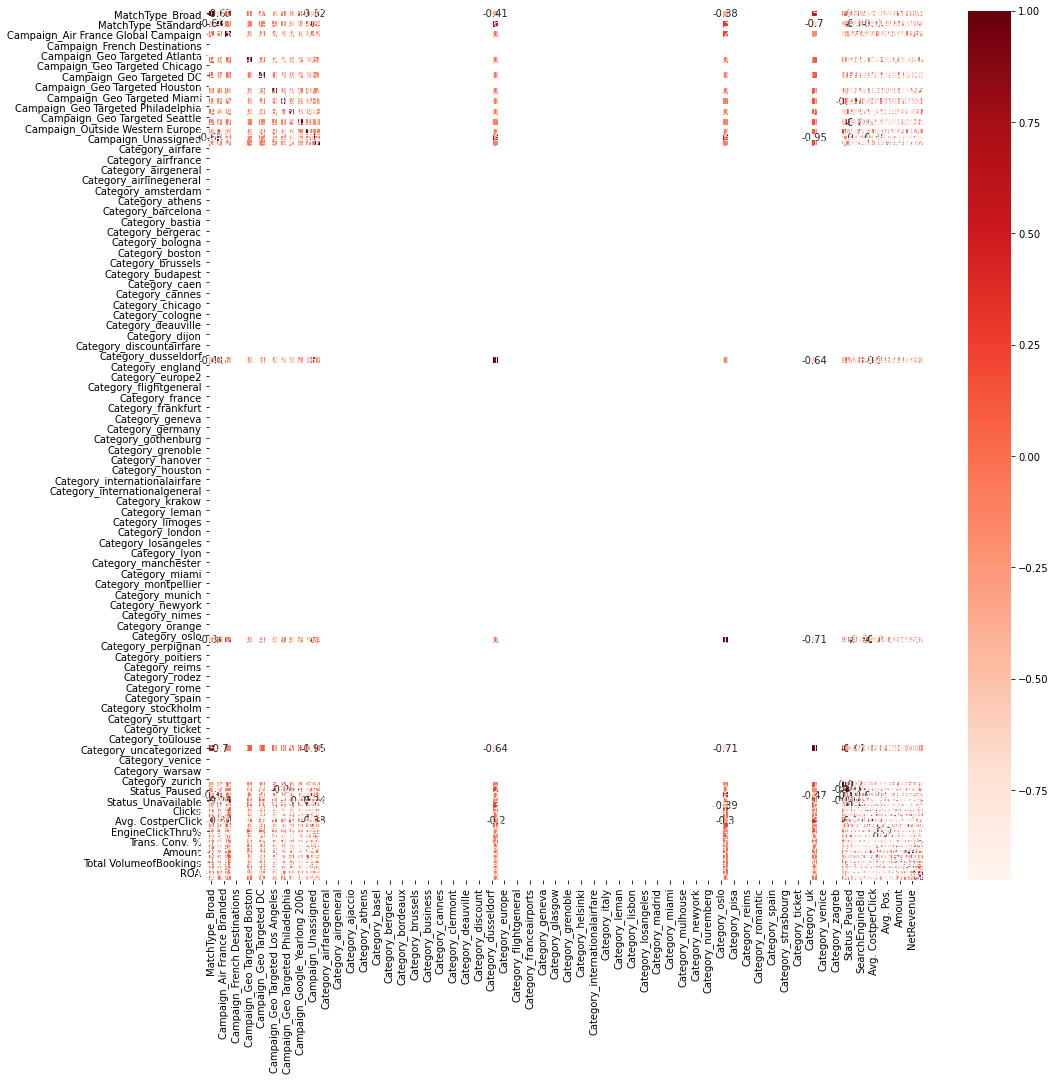

In [11]:
# Using Pearson Correlation for selecting variables that give significant results
plt.figure(figsize=(16,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
# 1. Removing features that are highly correlated with each other (> 0.8). Hence we would keep only one variable and drop the other.
cor_target = abs(cor["Total VolumeofBookings"])
cor.drop('Total VolumeofBookings', axis='columns', inplace=True)
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            if(cor.columns[i] not in correlated_features and cor.columns[j] not in correlated_features):
              if(cor_target[cor.columns[i]] > cor_target[cor.columns[j]]):
                correlated_features.add(cor.columns[j])
              else:
                correlated_features.add(cor.columns[i])
print("Features that can be removed are", correlated_features)

Features that can be removed are {'ROA', 'Total Cost', 'Category_uncategorized', 'NetRevenue', 'ClickCharges'}


In [13]:
df.drop(labels=correlated_features, axis=1, inplace=True)
cor.drop(labels=correlated_features, axis=1, inplace=True)
cor_target.drop(labels=correlated_features, inplace=True)

In [14]:
# 2. Selecting highly correlated features to our target variable
relevant_features = cor_target[cor_target > 0.5]
relevant_features

Clicks                    0.756847
Amount                    0.958909
Total VolumeofBookings    1.000000
Name: Total VolumeofBookings, dtype: float64

# Normalizing values between 0 and 1

In [15]:
# Normaliing all the values between 0 and 1
df_new = df[list(relevant_features.index)]
scaler = MinMaxScaler()
df_new = pd.DataFrame(scaler.fit_transform(df_new), columns = list(relevant_features.index))

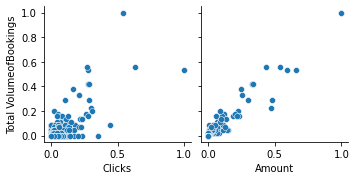

In [16]:
# Visualizing the relationship between the selected features and the target
x = df_new.drop(["Total VolumeofBookings"],1)
y = df_new["Total VolumeofBookings"]
sns.pairplot(df_new, x_vars = x.columns, y_vars = "Total VolumeofBookings")

# Training regression model to check if the selected features yield high accuracy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


R square value: 0.94

Model coefficients: 
        Coefficient
Clicks     0.080177
Amount     0.879913
c value 0.00022376067663115642


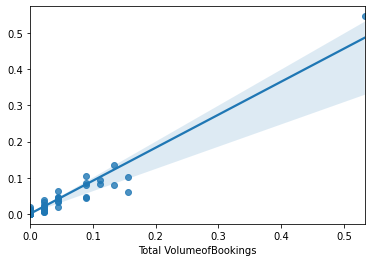

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
sns.regplot(y_test, y_pred)
print('R square value: %.2f' % model.score(x_test, y_test))

print("\nModel coefficients: ")
coeff_parameter = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
print(coeff_parameter)
print("c value", model.intercept_)